In [1]:
from IPython.display import clear_output
from modules.plotter import print_result
from modules.golomb_problem import init_simple_problem

import pygmo as pg
from scipy.optimize import differential_evolution

UDP = init_simple_problem()
real_bound = [(-1, 1) for _ in range(15)]+[(-10, 10) for _ in range(15)]

# Differencial Evolution

Algorithm: https://en.wikipedia.org/wiki/Differential_evolution

## SciPy

Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

### Stock

solution:  [ 0.21835217  0.23871056 -0.15075573 -0.14028291  0.31866852  0.37683394
 -0.44675452 -0.13210342  0.39638516 -0.2246715  -0.26405223  0.90722464
  0.04953683 -0.57679698 -0.0056112   0.67552777 -0.43225444 -0.57068775
  0.35372599  0.13804172  0.52656453  0.60641216 -0.42496929 -0.42135787
  0.88372974 -0.32379556 -0.08543933 -0.34592125 -0.84666001  0.37141473]
wrost Fill factor: -0.14286  ,	 wrost Empty factor(?) : 0.85714
XY


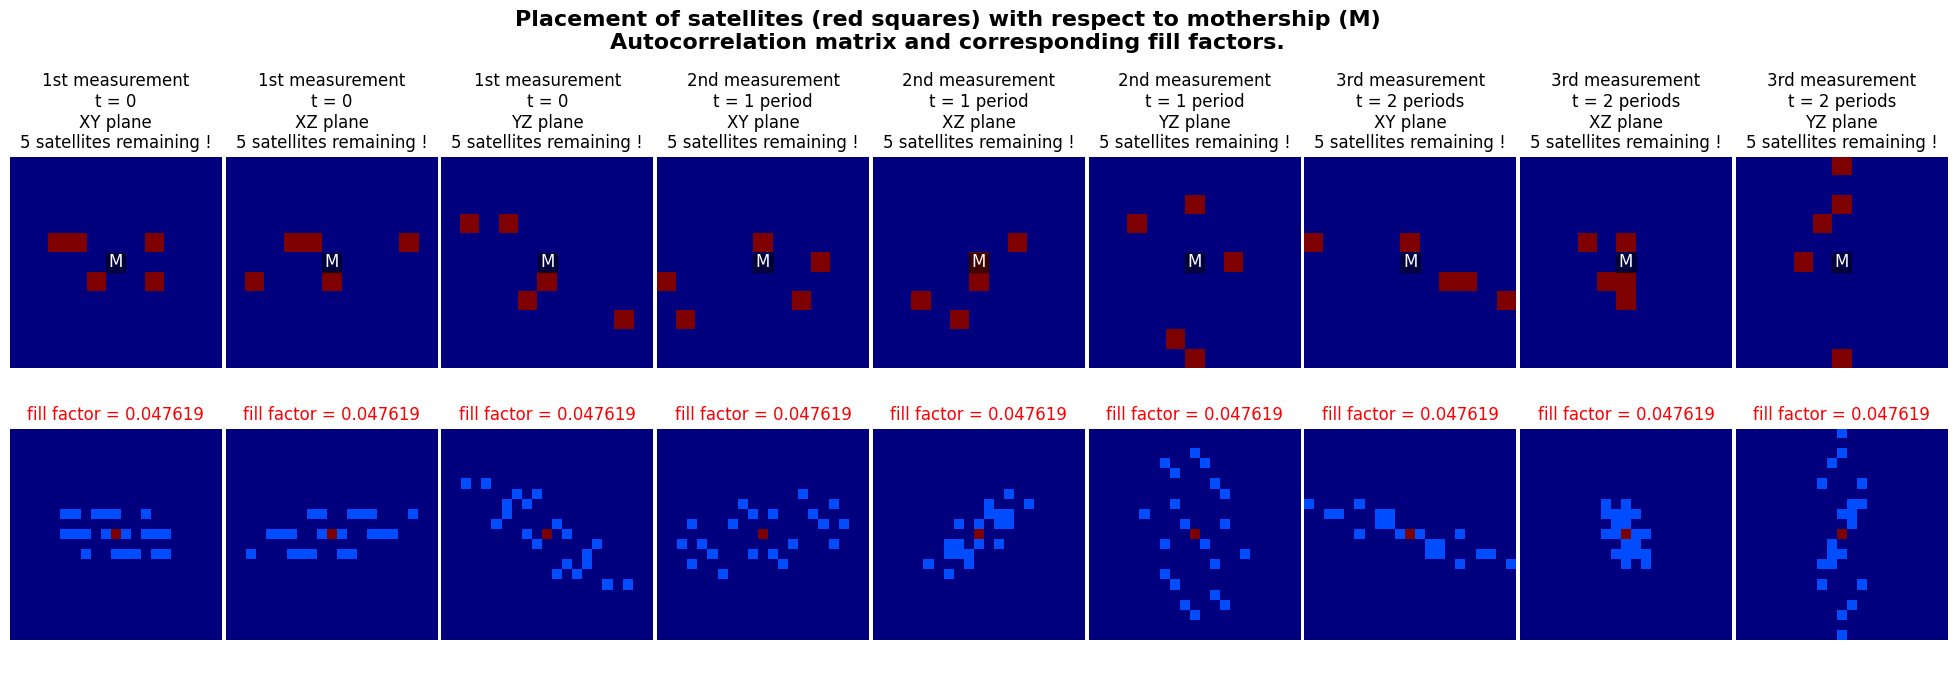

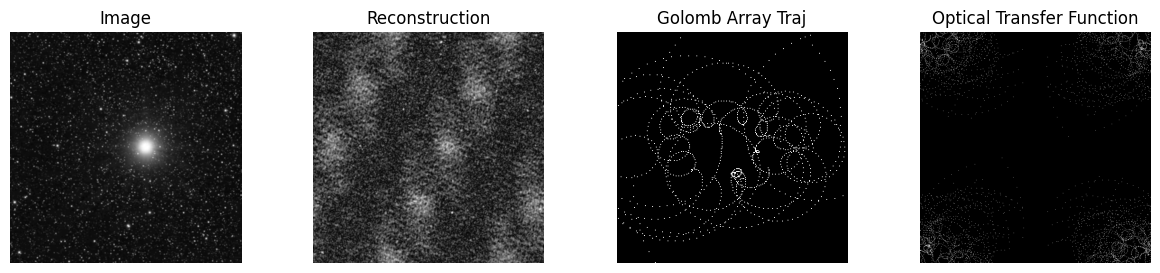

XZ


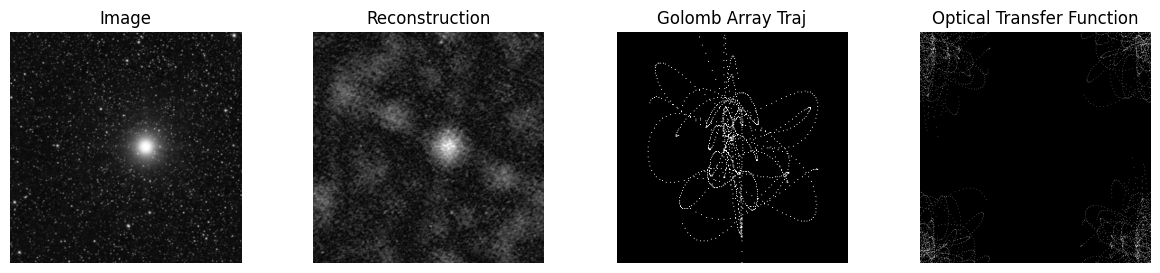

YZ


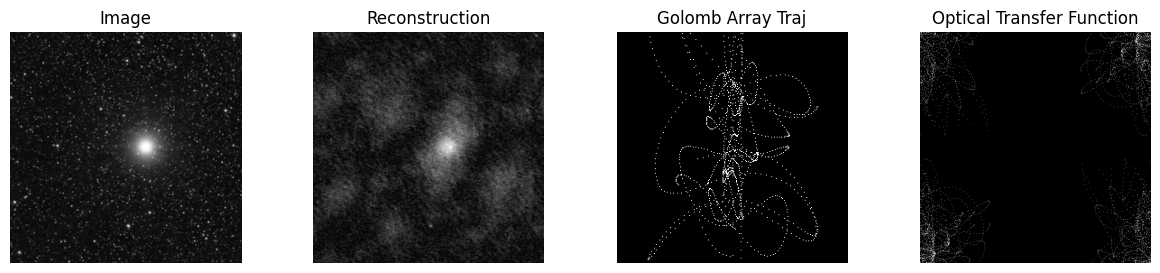

In [ ]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness(solution)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

### Force Golomb Optimal

In [3]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, reduce_fill_if_not_optimal=True)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

differential_evolution step 1: f(x)= -0.02040816326530612
differential_evolution step 2: f(x)= -0.047619047619047616


KeyboardInterrupt: 

### Force satellites in a smaller square

---

Solution:  [-0.05224902  0.22406335 -0.27962693  0.00817731  0.0796742  -0.34325159
 -0.12294039  0.4281886   0.14834028 -0.31718102 -0.07690635  0.93377695
  0.85087058  0.75164353  0.71480465 -0.41018582 -0.36160391  0.93279933
 -0.38187295 -0.54641622 -0.10975036  0.62541959 -0.74814491  0.01789656
  0.21529501  0.62170774 -0.90702236  0.01997452 -0.89312644  0.28087314]
Fitness:  [-0.14285714285714285]


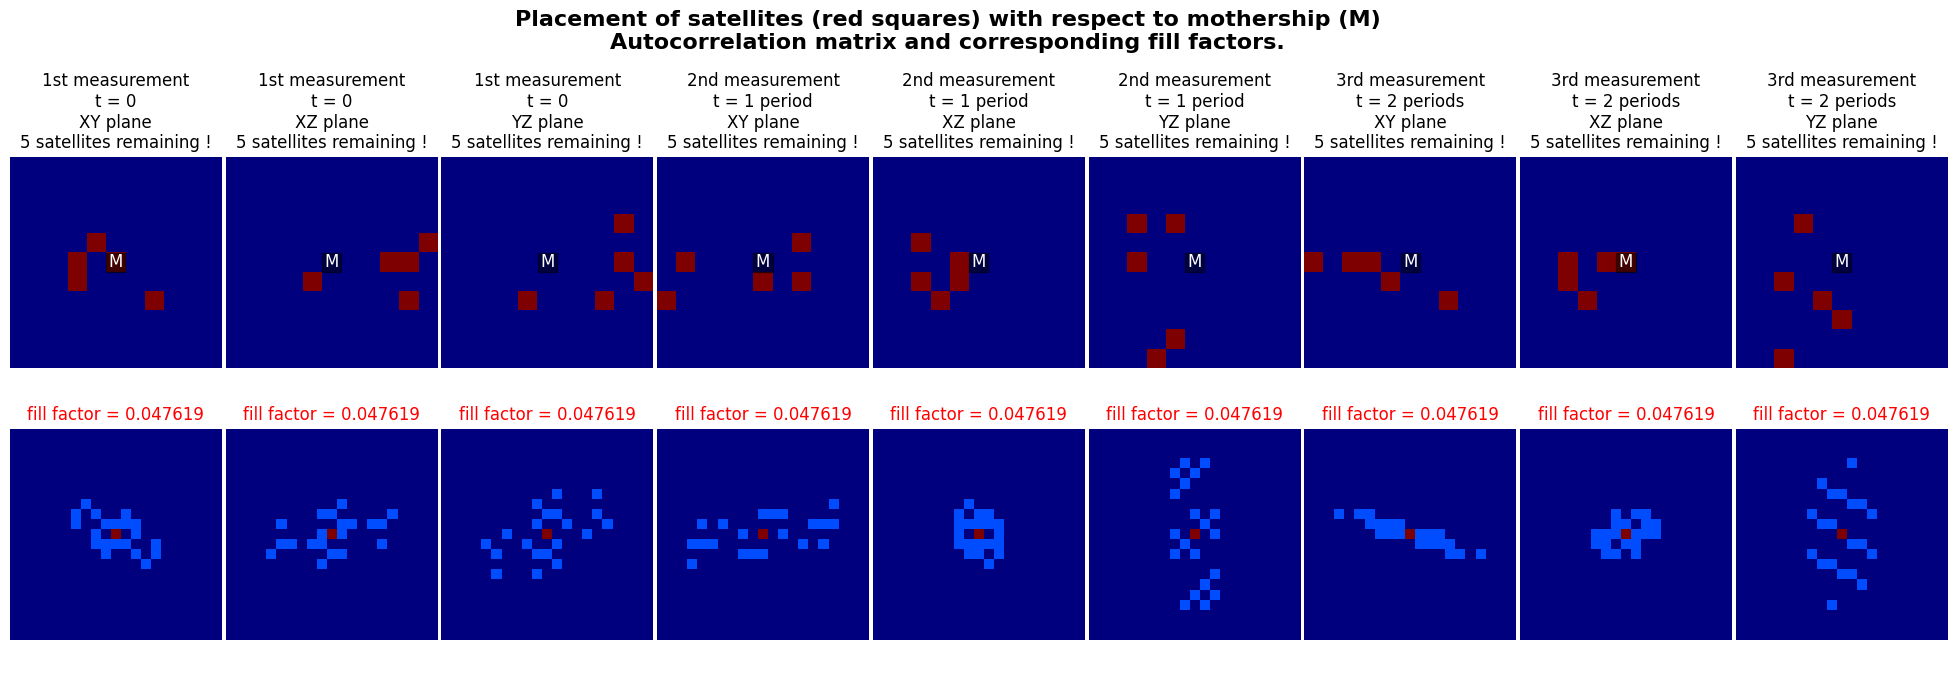

---

XY


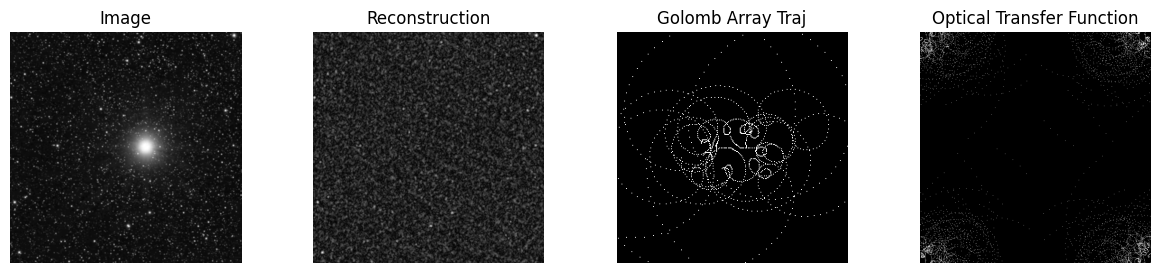

XZ


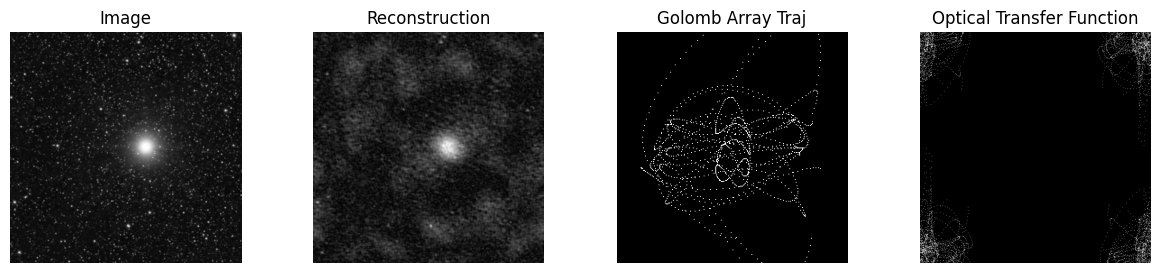

YZ


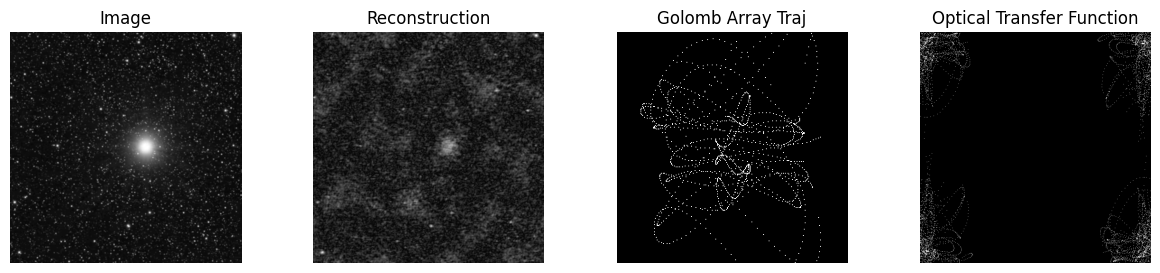

---

XY


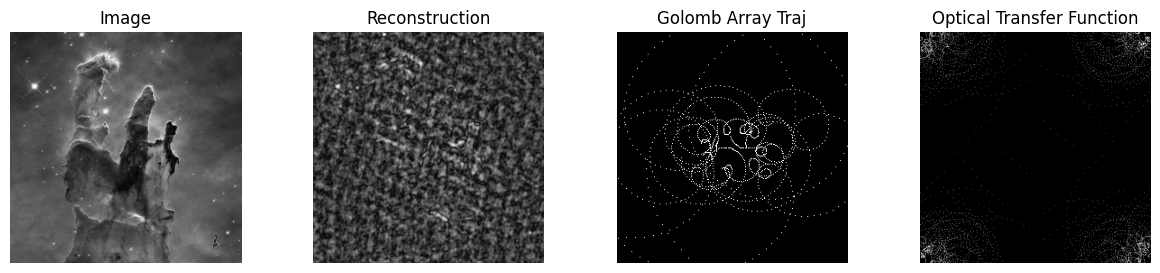

XZ


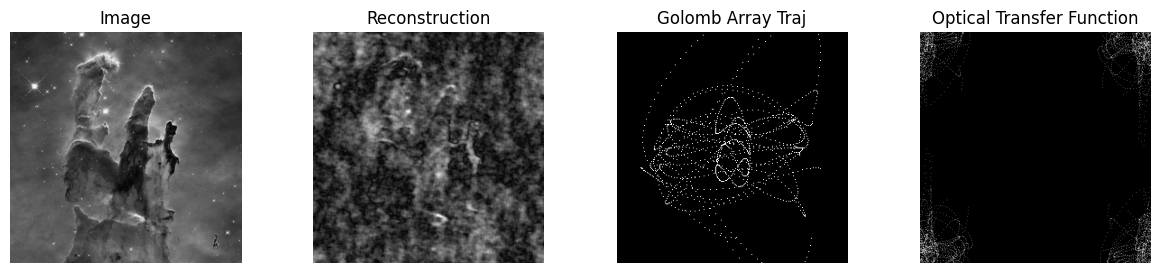

YZ


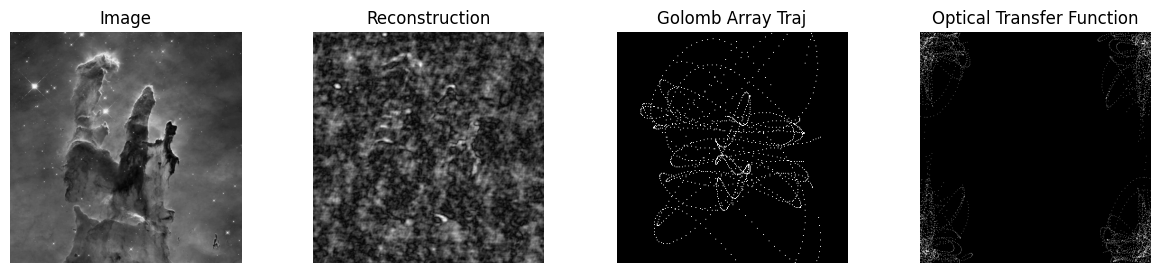

In [5]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

UDP.distance_limit_weight = 0.4
result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, limit_distance = 2)[0],
    x0=x0,
    maxiter=150,
    popsize=80,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x, show_simulated_reconstruction=True)

In [ ]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

UDP.distance_limit_weight = 0.4
result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, limit_distance = 3)[0],
    x0=x0,
    maxiter=250,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x, show_simulated_reconstruction=True)

differential_evolution step 1: f(x)= -0.02040816326530612
differential_evolution step 2: f(x)= -0.02040816326530612
differential_evolution step 3: f(x)= -0.02040816326530612
differential_evolution step 4: f(x)= -0.047619047619047616
differential_evolution step 5: f(x)= -0.047619047619047616
differential_evolution step 6: f(x)= -0.047619047619047616
differential_evolution step 7: f(x)= -0.047619047619047616
differential_evolution step 8: f(x)= -0.047619047619047616
differential_evolution step 9: f(x)= -0.047619047619047616
differential_evolution step 10: f(x)= -0.047619047619047616
differential_evolution step 11: f(x)= -0.047619047619047616
differential_evolution step 12: f(x)= -0.047619047619047616
differential_evolution step 13: f(x)= -0.047619047619047616
differential_evolution step 14: f(x)= -0.08390022675736962
differential_evolution step 15: f(x)= -0.08390022675736962
differential_evolution step 16: f(x)= -0.08843537414965986
differential_evolution step 17: f(x)= -0.08843537414965

KeyboardInterrupt: 

## PyGMO2

Doc: https://esa.github.io/pygmo2/overview.html

### Self-adaptive Differential Evolution


   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1            100    -0.00680272       0.997039       0.974851        17.1869     0.00680272
      3            300    -0.00680272       0.393878        0.99816        18.7009     0.00680272
      5            500    -0.00680272       0.219683       0.957427        20.9531     0.00680272
      7            700    -0.00680272       0.235855       0.219704        21.5757     0.00680272
      9            900    -0.00680272        0.22418       0.351693        17.1567     0.00680272
     11           1100    -0.00680272        0.22418       0.351693        15.2418     0.00680272
     13           1300    -0.00680272       0.507972       0.351693         18.748     0.00680272
     15           1500     -0.0204082       0.140248        0.60677        18.0238      0.0204082
     17           1700     -0.0204082       0.140248        0.60677        19.0439      0.0204082
     19           1

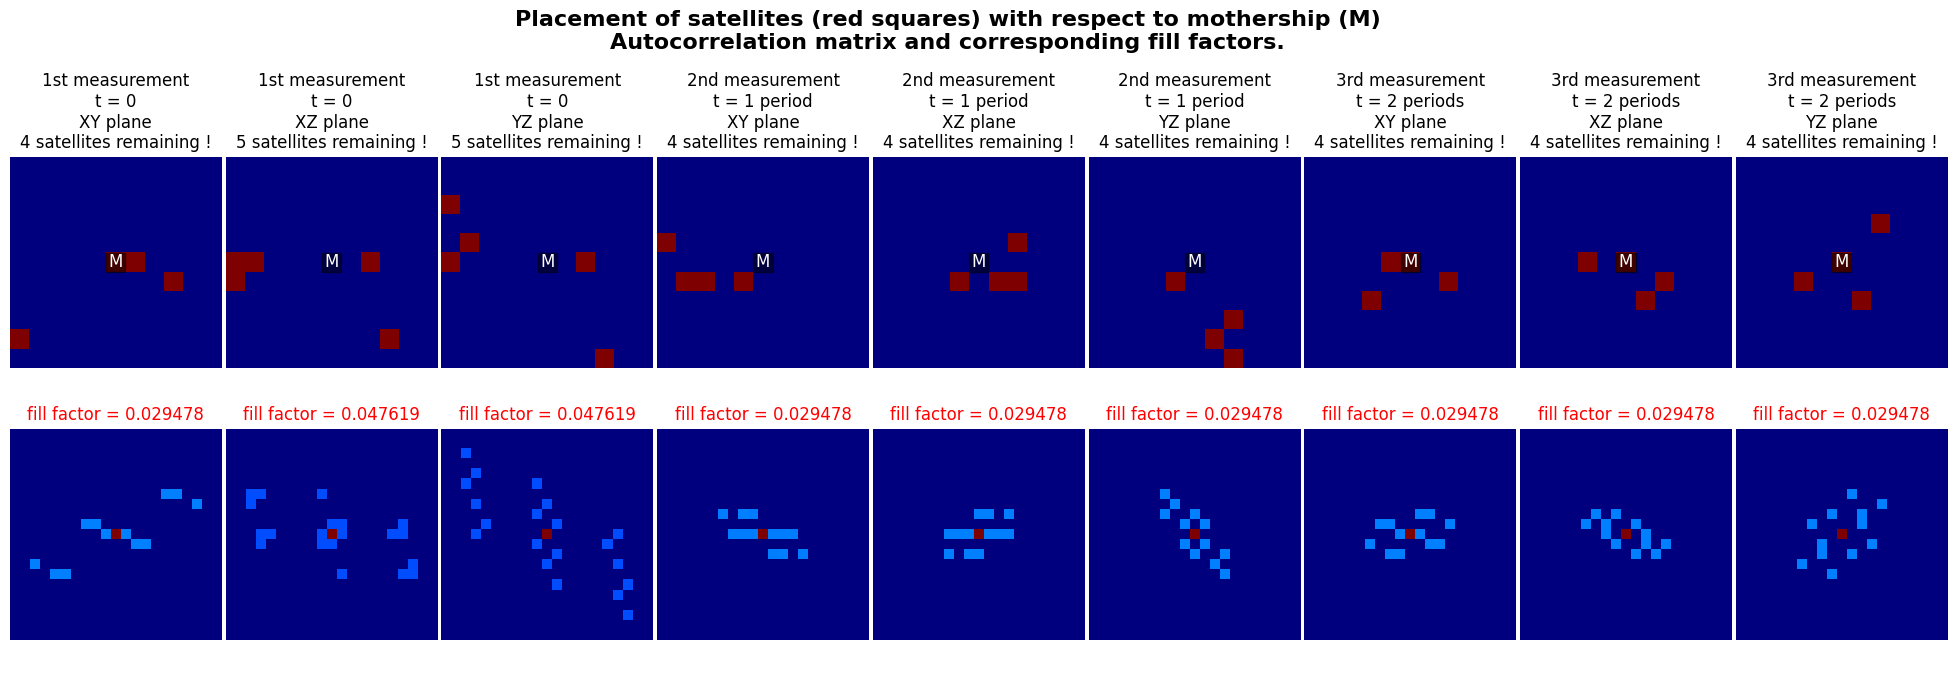

In [ ]:
algo = pg.algorithm(
    pg.sade(
        gen=150, 
        variant=2, 
        variant_adptv=1, 
        ftol=0, 
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=100)
elvo = algo.evolve(pop) 
x = elvo.champion_x

print_result(UDP,x)
del algo, prob, pop, elvo

### Self-adaptive Differential Evolution in pygmo flavour (pDE)

The adaptation of the mutation variant is added to `pygmo.sade`


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            100    -0.00680272       0.995184      0.0373429             15        16.9533     0.00680272
      3            300    -0.00680272       0.803966       0.937498             10        15.7806     0.00680272
      5            500    -0.00680272       0.995184      0.0373429             15        21.1419     0.00680272
      7            700     -0.0204082       0.803966       0.199415             10        18.4764      0.0204082
      9            900     -0.0204082       0.803966       0.199415             10        15.5767      0.0204082
     11           1100     -0.0204082       0.490803        0.55799              9        15.1106      0.0204082
     13           1300     -0.0204082       0.490803        0.55799              9        16.0539      0.0204082
     15           1500     -0.0204082       0.264097       0.225916              8        17.94

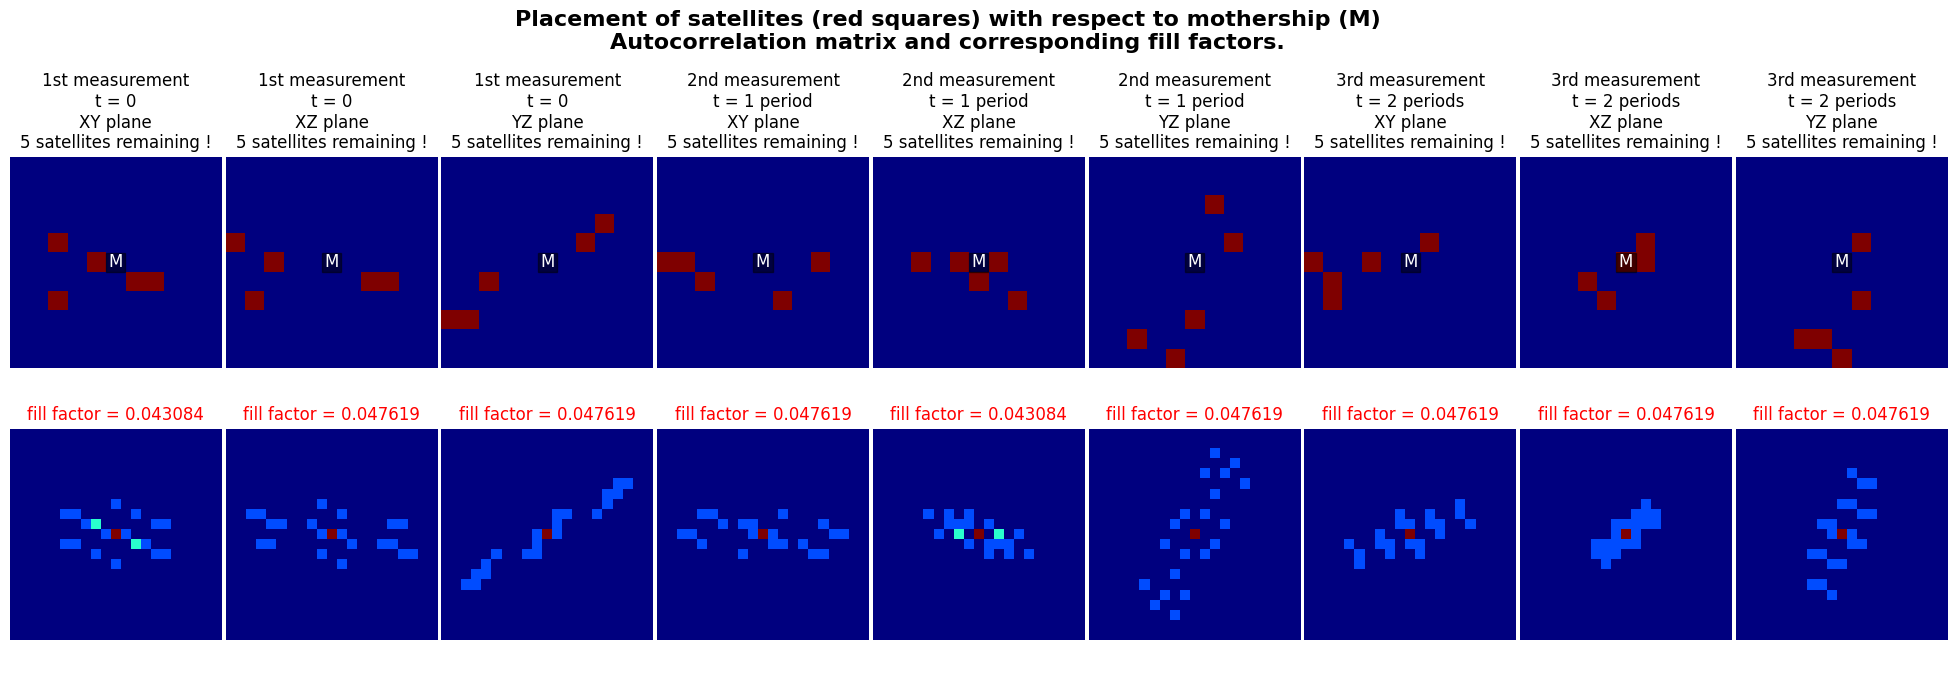

In [ ]:
algo = pg.algorithm(
    pg.de1220(
        gen=200, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=100)
elvo = algo.evolve(pop) 
x = elvo.champion_x

print_result(UDP,x)
del algo, prob, pop, elvo

# Medio

In [ ]:
from problems.golomb_medium import udp

algo = pg.algorithm(
    pg.de1220(
        gen=1500, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(udp)
pop = pg.population(prob,size=750)
elvo = algo.evolve(pop) 
x = elvo.champion_x

print_result(udp,x)
del algo, prob, pop, elvo

In [ ]:
algo = pg.algorithm(
    pg.sade(
        gen=1500, 
        variant=2, 
        variant_adptv=1, 
        ftol=0, 
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=750)
elvo = algo.evolve(pop) 
x = elvo.champion_x

print_result(UDP,x)
del algo, prob, pop, elvo

In [ ]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: udp.fitness(solution)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * udp.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(udp, result.x)

In [ ]:
x0 = None

result = differential_evolution(
    func=lambda solution: udp.fitness(solution)[0],
    x0=x0,
    maxiter=1000,
    popsize=200,
    bounds=[(-1.0, 1.0)] * udp.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(udp, result.x)